In [81]:
import string
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [2]:
ds=pd.read_csv("blogs.csv")
ds

Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]

In [3]:
# Tokenization
file_path = 'blogs.csv'


with open(file_path, 'r', encoding='utf-8') as file:
    text_data = file.read()


In [80]:
words = word_tokenize(text_data)
words

['Data',
 ',',
 'Labels',
 "''",
 'Path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'Germany.EU.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'D012S658',
 '!',
 'frank',
 'From',
 ':',
 'frank',
 '@',
 'D012S658.uucp',
 '(',
 'Frank',
 "O'Dwyer",
 ')',
 'Newsgroups',
 ':',
 'alt.atheism',
 'Subject',
 ':',
 'Re',
 ':',
 'islamic',
 'genocide',
 'Date',
 ':',
 '23',
 'Apr',
 '1993',
 '23:51:47',
 'GMT',
 'Organization',
 ':',
 'Siemens-Nixdorf',
 'AG',
 'Lines',
 ':',
 '110',
 'Distribution',
 ':',
 'world',
 'Message-ID',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'References',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [5]:
# Convert to lowercase
words2 = [i.lower() for i in words]
words2

['data',
 ',',
 'labels',
 "''",
 'path',
 ':',
 'cantaloupe.srv.cs.cmu.edu',
 '!',
 'magnesium.club.cc.cmu.edu',
 '!',
 'news.sei.cmu.edu',
 '!',
 'cis.ohio-state.edu',
 '!',
 'zaphod.mps.ohio-state.edu',
 '!',
 'howland.reston.ans.net',
 '!',
 'agate',
 '!',
 'doc.ic.ac.uk',
 '!',
 'uknet',
 '!',
 'mcsun',
 '!',
 'germany.eu.net',
 '!',
 'thoth.mchp.sni.de',
 '!',
 'horus.ap.mchp.sni.de',
 '!',
 'd012s658',
 '!',
 'frank',
 'from',
 ':',
 'frank',
 '@',
 'd012s658.uucp',
 '(',
 'frank',
 "o'dwyer",
 ')',
 'newsgroups',
 ':',
 'alt.atheism',
 'subject',
 ':',
 're',
 ':',
 'islamic',
 'genocide',
 'date',
 ':',
 '23',
 'apr',
 '1993',
 '23:51:47',
 'gmt',
 'organization',
 ':',
 'siemens-nixdorf',
 'ag',
 'lines',
 ':',
 '110',
 'distribution',
 ':',
 'world',
 'message-id',
 ':',
 '<',
 '1r9vej',
 '$',
 '5k5',
 '@',
 'horus.ap.mchp.sni.de',
 '>',
 'references',
 ':',
 '<',
 '1r4o8a',
 '$',
 '6qe',
 '@',
 'fido.asd.sgi.com',
 '>',
 '<',
 '1r5ubl',
 '$',
 'bd6',
 '@',
 'horus.ap.mchp.s

In [6]:
len(words)

922719

In [7]:
# Remove stopwords
stopwords_list = stopwords.words('english')
stopwords_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [8]:
# Remove stop words
words3 = []

for word in words2:
    if word not in stopwords_list:
        words3.append(word)

words3

print("after stopwords:", len(words3))


after stopwords: 678149


In [9]:
# Remove punctuation
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [10]:
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~.....''``'s'''

words_without_punctuation = []

for word in words3:
    if word not in punctuations:
        words_without_punctuation.append(word)


print("removing the punctuations: ",len(words_without_punctuation))

removing the punctuations:  437458


In [11]:
# Stemming
porter_stemmer = PorterStemmer()

stemmed_words = [porter_stemmer.stem(word) for word in words_without_punctuation]

print(len(stemmed_words))

437458


In [12]:
#OBSERVING THE MOST REPEATED WORDS FROM THE STEMMED WORDS...

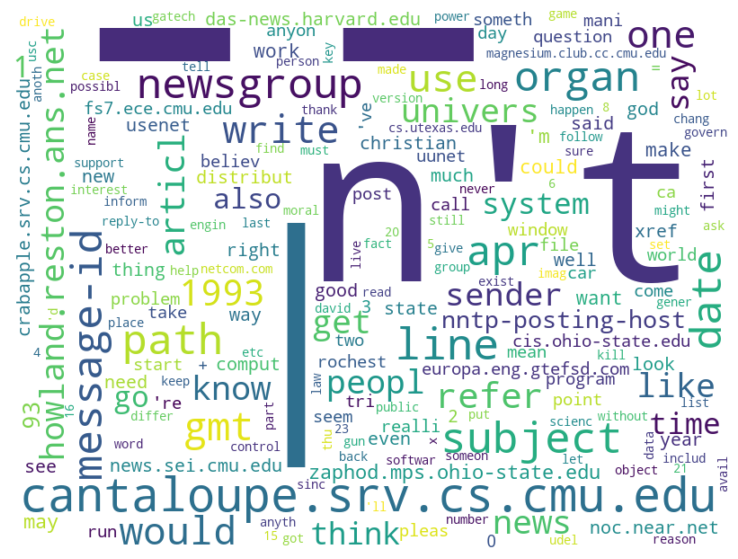

In [13]:
# Word Cloud
word_counts = {}

for word in stemmed_words:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1


# Create the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [14]:
#observing the words from the above wordcloud that are most repeatedly shown...
#artic1,date,also,n't,cantaloupe.srv.cs.cmu.edu,message-id,howland.reston.ans.net...

In [15]:
# Clean up most frequently appearing irrelevant words
words4 = [word for word in stemmed_words if word not in ["n't", "cantaloupe.srv.cs.cmu.edu", "message-id", "newsgroup",
                                                         'howland.reston.ans.net','articl','date','line','apr','say','also']]

len(words4)

417149

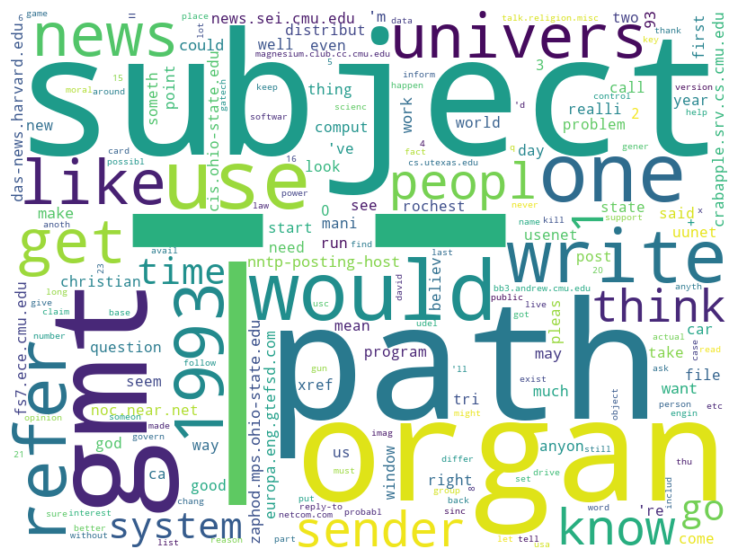

In [16]:
# Create a dictionary to store the word frequency
word_counts = {}

for word in words4:
  if word not in word_counts:
    word_counts[word] = 0
  word_counts[word] += 1


# Create the word cloud
wordcloud = WordCloud(width=800, height=600, background_color="white").generate_from_frequencies(word_counts)

# Display the word cloud
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [17]:
#JOINING THE WORDS INTO THE DOCUMENT AFTER DOING ALL THE PRE-PROCESSING STEPS...

In [18]:
doc = " ".join(words4)
doc

"data label path magnesium.club.cc.cmu.edu news.sei.cmu.edu cis.ohio-state.edu zaphod.mps.ohio-state.edu agat doc.ic.ac.uk uknet mcsun germany.eu.net thoth.mchp.sni.d horus.ap.mchp.sni.d d012s658 frank frank d012s658.uucp frank o'dwyer alt.ath subject islam genocid 23 1993 23:51:47 gmt organ siemens-nixdorf ag 110 distribut world 1r9vej 5k5 horus.ap.mchp.sni.d refer 1r4o8a 6qe fido.asd.sgi.com 1r5ubl bd6 horus.ap.mchp.sni.d 1r76ek 7uo fido.asd.sgi.com nntp-posting-host d012s658.ap.mchp.sni.d 1r76ek 7uo fido.asd.sgi.com livesey solntze.wpd.sgi.com jon livesey write 1r5ubl bd6 horus.ap.mchp.sni.d frank d012s658.uucp frank o'dwyer write | 1r4o8a 6qe fido.asd.sgi.com livesey solntze.wpd.sgi.com jon livesey write | | note particular societi case mainland uk | relig motiv murder murder | kind littl whether inter-religion murder elsewher | religi motiv | | allow one conclud noth inher | religion matter catholic protestant | motiv one kill motiv allow christian bibl one may kill certain circum

In [19]:
# Create a CountVectorizer object with ngram_range=(2, 2) to extract bigrams
vect = CountVectorizer(ngram_range=(2, 2))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts

<1x280205 sparse matrix of type '<class 'numpy.int64'>'
	with 280205 stored elements in Compressed Sparse Row format>

In [20]:
# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

array(['00 00', '00 01', '00 02', ..., 'zz2q1 4js0', 'zzs 7kd4',
       'zzx 1am'], dtype=object)

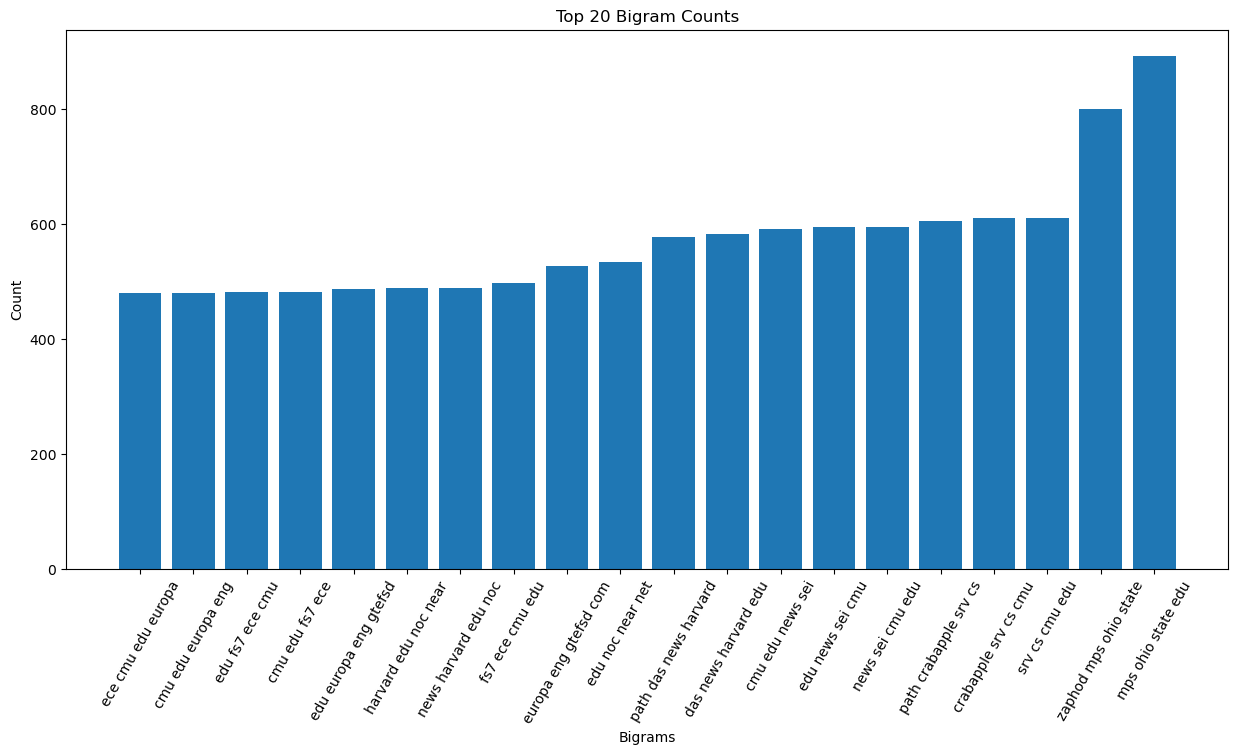

In [71]:
# Get the top 20 bigram counts
top_20_bigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 bigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_bigrams], counts.toarray()[0, top_20_bigrams])
plt.xticks(rotation=60)
plt.xlabel("Bigrams")
plt.ylabel("Count")
plt.title("Top 20 Bigram Counts")
plt.show()

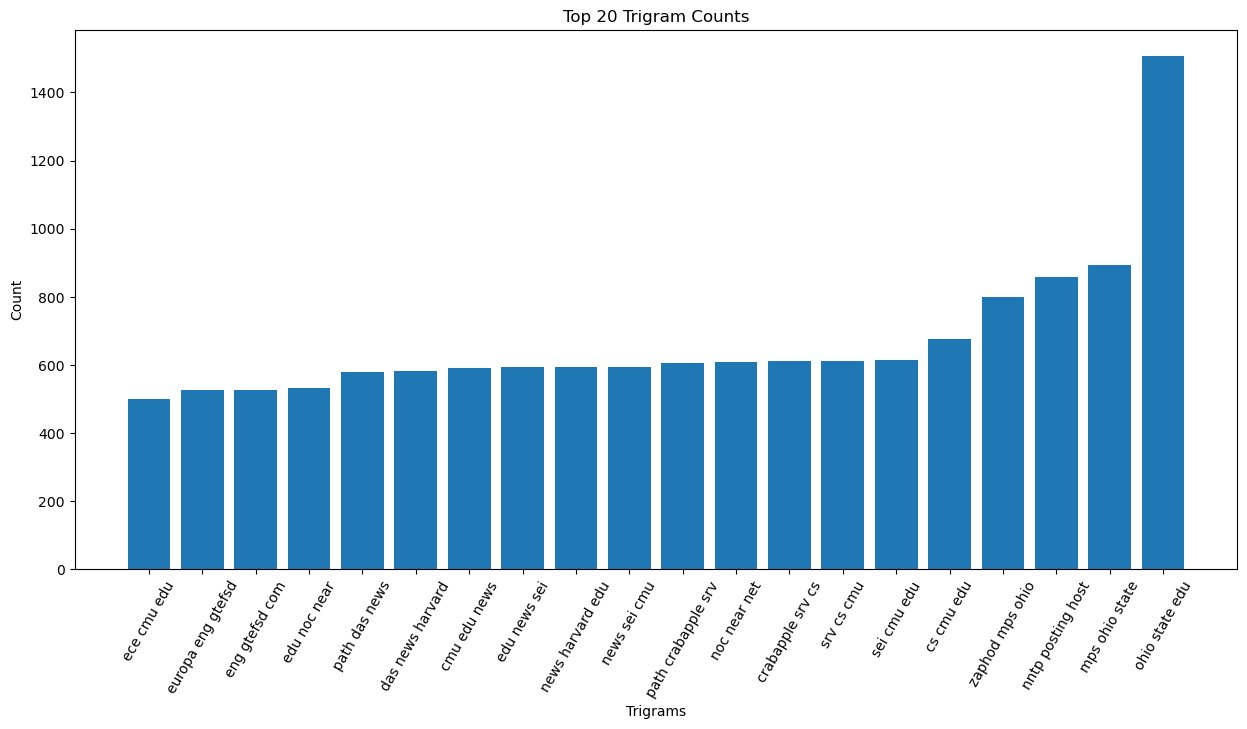

In [72]:
# Create a CountVectorizer object with ngram_range=(3, 3) to extract trigrams
vect = CountVectorizer(ngram_range=(3, 3))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts


# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

# Get the top 20 trigram counts
top_20_trigrams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 trigram counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_trigrams], counts.toarray()[0, top_20_trigrams])
plt.xticks(rotation=60)
plt.xlabel("Trigrams")
plt.ylabel("Count")
plt.title("Top 20 Trigram Counts")
plt.show()

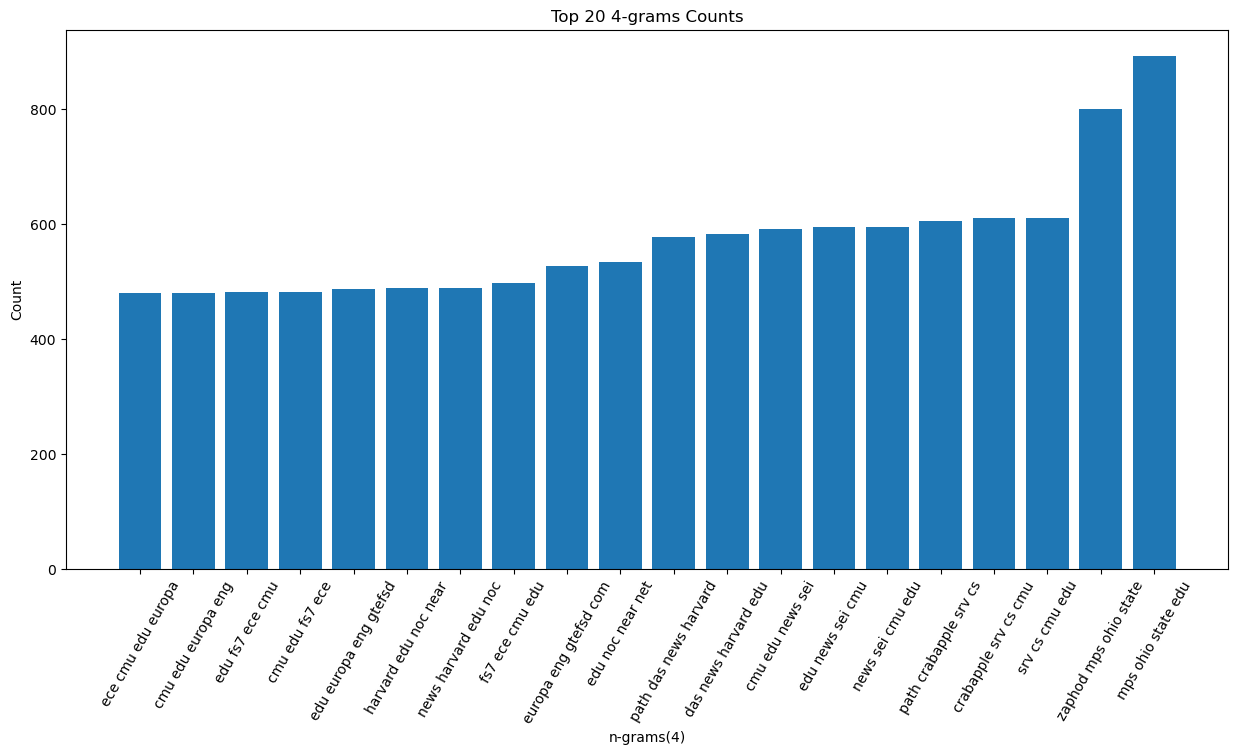

In [73]:
# Create a CountVectorizer object with ngram_range=(4,4) to extract n-grams
vect = CountVectorizer(ngram_range=(4,4))

# Fit the vectorizer to the document
counts = vect.fit_transform([doc])
counts


# Get the vocabulary of the vectorizer
vocab = vect.get_feature_names_out()
vocab

# Get the top 20 4-grams counts
top_20_4grams = counts.toarray().sum(axis=0).argsort()[-20:]

# Create a bar chart of the top 20 4-grams counts
plt.figure(figsize=(15, 7))
plt.bar(vocab[top_20_4grams], counts.toarray()[0, top_20_4grams])
plt.xticks(rotation=60)
plt.xlabel("n-grams(4)")
plt.ylabel("Count")
plt.title("Top 20 4-grams Counts")
plt.show()


In [24]:
# Sentiment Analysis
analyzer = SentimentIntensityAnalyzer()

In [25]:
# Combine Data and Labels for sentiment analysis
ds['Data,Labels'] = ds['Data'] + ds['Labels']
ds

Data              Labels  \
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism   
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism   
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism   
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism   
...                                                 ...                 ...   
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc   
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc   
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc   
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc   

                                            Data,Labels  
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....  
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...  
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...  
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...  
...                                                 ...  
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  

[2000 rows x 3 columns]

In [26]:
#combining data and labels in to observe sentiment column...

In [27]:
ds.drop(ds.columns[[0,1]],axis=1,inplace=True)
ds

Data,Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...                                                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...

[2000 rows x 1 columns]

In [85]:
# Sentiment analysis and classification
ds['Sentiment_0'] = ds['Data,Labels'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
def classify_sentiment(score):
    if score > 0.05:
        return 'positive'
    elif score < -0.05:
        return 'negative'
    else:
        return 'neutral'

In [83]:
# Adding neutral sentiment classificatione
ds['Sentiment'] = ds['Sentiment_0'].apply(lambda x: 'positive' if x > 0 else 'negative')
ds["Sentiment"].value_counts()

positive    1431
negative     569
Name: Sentiment, dtype: int64

In [31]:
# Preprocessing Data
ds['Data,Labels'] = ds['Data,Labels'].str.lower()
ds.head()

Data,Labels  Sentiment_0 Sentiment
0  path: cantaloupe.srv.cs.cmu.edu!magnesium.club...      -0.9966  negative
1  newsgroups: alt.atheism\npath: cantaloupe.srv....       0.8856  positive
2  path: cantaloupe.srv.cs.cmu.edu!das-news.harva...      -0.9969  negative
3  path: cantaloupe.srv.cs.cmu.edu!magnesium.club...      -0.9999  negative
4  xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...       0.9821  positive

In [32]:
ds['Data,Labels'] = ds['Data,Labels'].str.replace('[{}]'.format(string.punctuation), '')
ds.head()

C:\Users\ajayd\AppData\Local\Temp\ipykernel_13300\4073120935.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['Data,Labels'] = ds['Data,Labels'].str.replace('[{}]'.format(string.punctuation), '')


Data,Labels  Sentiment_0 Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9966  negative
1  newsgroups altatheism\npath cantaloupesrvcscmu...       0.8856  positive
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...      -0.9969  negative
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9999  negative
4  xref cantaloupesrvcscmuedu altatheism53485 tal...       0.9821  positive

In [33]:
lemmatizer = WordNetLemmatizer()


ds['Data,Labels'] = ds['Data,Labels'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))
ds.head()

Data,Labels  Sentiment_0 Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9966  negative
1  newsgroups altatheism path cantaloupesrvcscmue...       0.8856  positive
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...      -0.9969  negative
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9999  negative
4  xref cantaloupesrvcscmuedu altatheism53485 tal...       0.9821  positive

In [34]:
#removing the stop words...
stop_words = set(stopwords.words('english'))

ds['Data,Labels'] = ds['Data,Labels'].apply(lambda x: " ".join([word for word in x.split() if word not in stop_words]))
ds.head()

Data,Labels  Sentiment_0 Sentiment
0  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9966  negative
1  newsgroups altatheism path cantaloupesrvcscmue...       0.8856  positive
2  path cantaloupesrvcscmuedudasnewsharvardedunoc...      -0.9969  negative
3  path cantaloupesrvcscmuedumagnesiumclubcccmued...      -0.9999  negative
4  xref cantaloupesrvcscmuedu altatheism53485 tal...       0.9821  positive

In [35]:
ds.value_counts()

Data,Labels                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

In [36]:
# Target and Features
Y = ds["Sentiment"]
x = ds['Data,Labels']

In [37]:
#splitting target and training data...
Y

0       negative
1       positive
2       negative
3       negative
4       positive
          ...   
1995    positive
1996    positive
1997    positive
1998    positive
1999    negative
Name: Sentiment, Length: 2000, dtype: object

In [38]:
Y.value_counts()

positive    1334
negative     666
Name: Sentiment, dtype: int64

In [40]:
x

0       path cantaloupesrvcscmuedumagnesiumclubcccmued...
1       newsgroups altatheism path cantaloupesrvcscmue...
2       path cantaloupesrvcscmuedudasnewsharvardedunoc...
3       path cantaloupesrvcscmuedumagnesiumclubcccmued...
4       xref cantaloupesrvcscmuedu altatheism53485 tal...
                              ...                        
1995    xref cantaloupesrvcscmuedu talkabortion120945 ...
1996    xref cantaloupesrvcscmuedu talkreligionmisc837...
1997    xref cantaloupesrvcscmuedu talkorigins41030 ta...
1998    xref cantaloupesrvcscmuedu talkreligionmisc836...
1999    xref cantaloupesrvcscmuedu sciskeptic43561 tal...
Name: Data,Labels, Length: 2000, dtype: object

In [41]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(x)

0      1      2      3      4      5      6      7      8      9      \
0       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4       0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1996    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1997    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1998    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1999    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      ...  53487  53488  53489  53490  53491  53492  53493  53494  53495  \
0     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
3     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
4     ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...   ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
1995  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1996  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1997  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1998  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
1999  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

      53496  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
...     ...  
1995    0.0  
1996    0.0  
1997    0.0  
1998    0.0  
1999    0.0  

[2000 rows x 53497 columns]

In [94]:
# Split the resampled data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, stratify=Y)

In [95]:
# Naive Bayes Classifier
model = MultinomialNB()
model.fit(X_train, Y_train)

MultinomialNB()

In [96]:
# Make predictions
Y_pred_test = model.predict(X_test)

In [103]:
# Evaluate the model
accuracy = accuracy_score(Y_test, Y_pred_test)
precision = precision_score(Y_test, Y_pred_test, average='weighted', zero_division=1)
recall = recall_score(Y_test, Y_pred_test, average='weighted')
f1 = f1_score(Y_test, Y_pred_test, average='weighted', zero_division=1)

In [104]:
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.66
Precision: 0.70
Recall: 0.66
F1 Score: 0.67


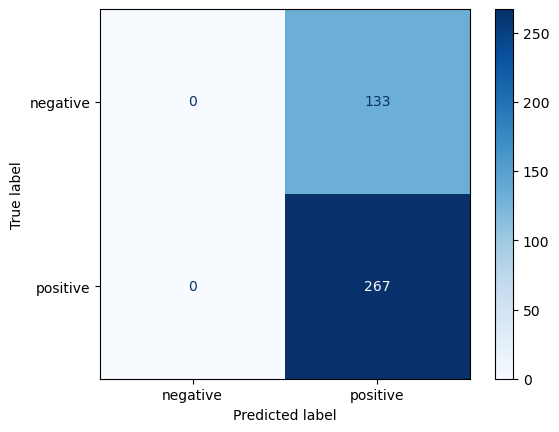

In [99]:
# Confusion matrix for visual inspection of performance
cm = confusion_matrix(Y_test, Y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [105]:
# Detailed classification report
print("\nClassification Report:\n", classification_report(Y_test, Y_pred_test, zero_division=1))


Classification Report:
               precision    recall  f1-score   support

    negative       0.49      0.68      0.57       133
    positive       0.80      0.65      0.72       267

    accuracy                           0.66       400
   macro avg       0.65      0.67      0.65       400
weighted avg       0.70      0.66      0.67       400



In [101]:
from imblearn.over_sampling import SMOTE
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# X_train and Y_train are already defined
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

# Train the Naive Bayes model on the resampled data
model = MultinomialNB()
model.fit(X_train_resampled, Y_train_resampled)

# Predict and evaluate
Y_pred_test = model.predict(X_test)

In [102]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(class_weight='balanced')
model.fit(X_train, Y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# Performance Summary:

# Positive Class: The model achieves higher precision and F1-score for the positive class,indicating
# that when it predicts a positive sentiment, it is more accurate. However, its recall is slightly
# lower, suggesting it misses some positive examples.

# Negative Class: The model's recall for the negative class is relatively high, showing
# that it correctly identifies many negative instances. However, its precision is
# lower, meaning it also classifies some positive examples as negative.

# Overall Accuracy: The overall accuracy of 66% reflects that the model correctly
# classifies 66% of the instances across both classes.

# Macro Average: Provides the average performance across both classes, treating
# all classes equally. The macro average F1-score of 0.65 indicates a balance 
# between precision and recall across both classes.

# Weighted Average: Takes into account the class distribution, providing a more balanced 
# view of performance, with an F1-score of 0.67.

# Conclusion:

# The Naive Bayes model demonstrates a good understanding of the positive class, with higher
# precision and F1-score, but struggles with precision for the negative class. 